# Import Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

mon_features = pd.read_csv('/content/drive/MyDrive/Machine_Learning/mon_features_modified.csv')
mon_labels = pd.read_csv('/content/drive/MyDrive/Machine_Learning/mon_labels.csv')

unmon_features = pd.read_csv('/content/drive/MyDrive/Machine_Learning/unmon_features_modified.csv')
unmon_labels = pd.read_csv('/content/drive/MyDrive/Machine_Learning/unmon_labels.csv')

In [3]:
features = pd.concat([mon_features, unmon_features], axis=0, ignore_index=True)
labels = pd.concat([mon_labels, unmon_labels], axis=0, ignore_index=True)

# Building Decision Tree Model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def scaler_samples(train_X,test_X):
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

X, y = features, labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_multi = DecisionTreeClassifier(random_state=1)
dt_multi.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = dt_multi.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

Accuracy: 0.5768965517241379
Confusion Matrix
 [[1286   15    6 ...   20    0    6]
 [  13   11    0 ...    0    0    1]
 [  10    0   15 ...    0    0    0]
 ...
 [   9    1    1 ...   12    0    1]
 [   1    0    0 ...    0   39    0]
 [   6    1    0 ...    0    0   17]]


# Hyperparameter Tuning with GridSearchCV
- 1st Attempt

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 18, 19, 21],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(dt_multi, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best_Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

Best_Parameters: {'max_depth': 19, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [10]:
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

Accuracy: 0.5906896551724138
Confusion Matrix
 [[1428   14    4 ...   10    0    4]
 [  13    8    0 ...    0    0    1]
 [  11    0   15 ...    0    0    0]
 ...
 [  10    1    0 ...   10    0    1]
 [   1    0    0 ...    0   39    0]
 [  11    0    0 ...    0    0   19]]


- 2nd Attempt

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 13, 15, 17, 20, 21, 22],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(dt_multi, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best_Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

Best_Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

Accuracy: 0.588103448275862
Confusion Matrix
 [[1474    8   13 ...   17    1    5]
 [  13    9    0 ...    1    0    1]
 [  18    0   12 ...    1    0    0]
 ...
 [  15    0    0 ...    9    0    0]
 [   1    0    0 ...    0   38    0]
 [   8    0    0 ...    0    0   21]]


- 3rd Attempt

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [22],
    'min_samples_split': [8, 9, 10, 11, 12],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None]
}

grid_search = GridSearchCV(dt_multi, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best_Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

Best_Parameters: {'max_depth': 22, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix\n {conf_matrix}")

Accuracy: 0.5891379310344828
Confusion Matrix
 [[1460    9   12 ...   16    1    5]
 [  15    9    0 ...    0    0    0]
 [  19    0   12 ...    0    0    0]
 ...
 [  14    0    0 ...   11    0    0]
 [   1    0    0 ...    0   38    0]
 [   6    0    0 ...    0    0   16]]


# Building Ada Boosting Model

In [11]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(base_estimator=grid_search.best_estimator_, random_state=1)

adaboost_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=19,
                                                         random_state=1),
                   random_state=1)

In [12]:
y_pred_adaboost = adaboost_model.predict(X_test)

acc_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {acc_adaboost}")

conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
print(f"AdaBoost Confusion Matrix\n {conf_matrix_adaboost}")

AdaBoost Accuracy: 0.6772413793103448
AdaBoost Confusion Matrix
 [[1886    0    1 ...    2    0    0]
 [  26   15    0 ...    0    0    0]
 [  35    0    8 ...    0    0    0]
 ...
 [  27    0    0 ...    9    0    1]
 [   6    0    0 ...    0   37    0]
 [  15    0    0 ...    0    0   21]]


# Evaluation Metrics

In [13]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [14]:
# Calculating Precision and Recall
precision = precision_score(y_test, y_pred_adaboost, average='weighted')
recall = recall_score(y_test, y_pred_adaboost, average='weighted')

In [16]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.766109650238849
Recall: 0.6772413793103448


In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Classification Report
class_report = classification_report(y_test, y_pred_adaboost)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          -1       0.54      0.98      0.70      1932
           0       0.94      0.34      0.50        44
           1       0.89      0.18      0.30        45
           2       1.00      0.53      0.70        43
           3       0.95      0.53      0.68        36
           4       1.00      0.52      0.68        50
           5       0.90      0.47      0.62        38
           6       0.95      0.77      0.85        52
           7       0.89      0.78      0.83        41
           8       0.96      0.56      0.71        41
           9       1.00      0.58      0.73        50
          10       0.91      0.51      0.66        41
          11       0.88      0.43      0.58        35
          12       0.91      0.87      0.89        47
          13       0.67      0.11      0.19        36
          14       0.91      0.21      0.34        47
          15       0.74      0.32      0.44        44
   

Text(0, 0.5, 'Precision')

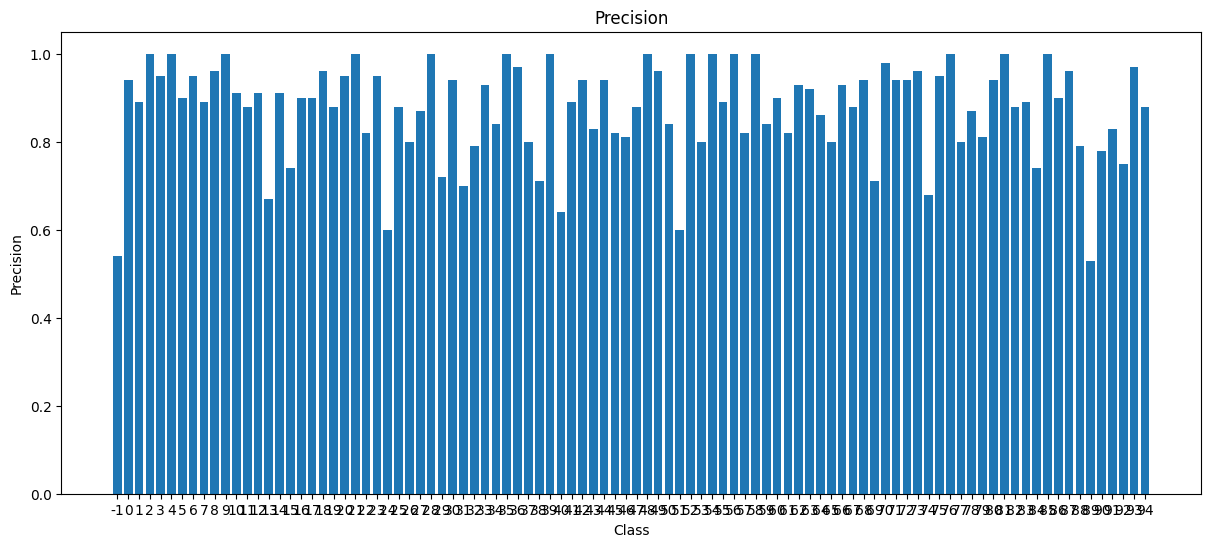

In [18]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd


data = []
lines = class_report.split('\n')
for line in lines[2:-5]:
    row = line.strip().split()
    class_name = row[0]
    precision = float(row[1])
    recall = float(row[2])
    f1_score = float(row[3])
    data.append([class_name, precision, recall, f1_score])


df = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-score'])

plt.figure(figsize=(50, 6))

# Precision
plt.subplot(1, 3, 1)
plt.bar(df['Class'], df['Precision'])
plt.title('Precision')
plt.xlabel('Class')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

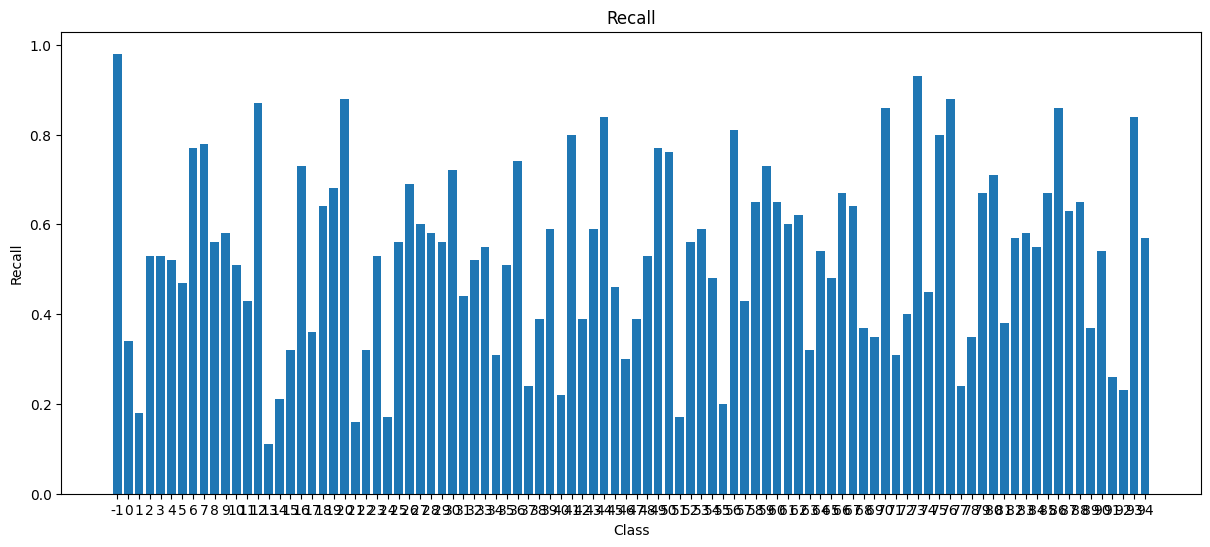

In [19]:
plt.figure(figsize=(50, 6))

# Recall
plt.subplot(1, 3, 2)
plt.bar(df['Class'], df['Recall'])
plt.title('Recall')
plt.xlabel('Class')
plt.ylabel('Recall')

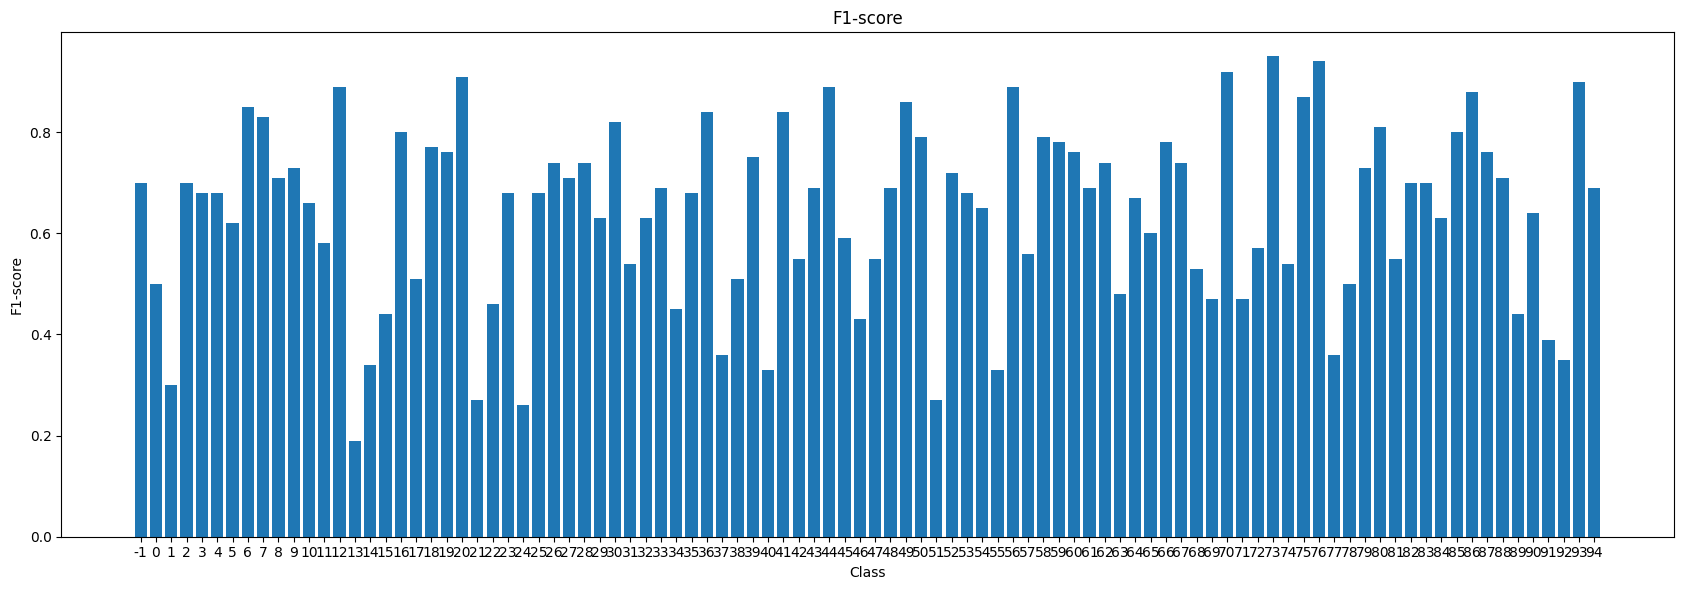

In [20]:
plt.figure(figsize=(50, 6))

# F1-score
plt.subplot(1, 3, 3)
plt.bar(df['Class'], df['F1-score'])
plt.title('F1-score')
plt.xlabel('Class')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()